In [7]:
import tweepy
import webbrowser
import pandas as pd
import sklearn.datasets as skd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk import pos_tag
import string
from random import shuffle

In [8]:
# for auth
consumer_key = "82sYf9hQSpGNuc9K8wTVGABqz0"
consumer_secret = "6tf3Iu3eiaLesTA2yxZPD2Ht7cdgJxis4Nk8vxBH0ltAPD3enaNBK"

In [9]:
callback_uri = 'oob'

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=s1HubvAwABMAAjsyBpATABceMY7y9


In [11]:
webbrowser.open(redirect_url)

True


In [12]:
user_pint_input = input()

6350069


In [13]:
auth.get_access_token(user_pint_input)

('4730574793-fa9oFomAHt4K4iw5uaWRaG0iw1OxCUu47ieHm5Q','fOC4HAcXzr35dl8gZdzZdkC0dBr7l26pOvJv56oqF4yTf')


In [14]:
api = tweepy.API(auth)

In [15]:
# grounding date of Boing 737 MAX-8 Aircraft
date_since = "2019-03-18"
search_words_1 = "737" + " -filter:retweets"
search_words_2 = "Boeing" + " -filter:retweets"
search_words_3 = "737 MAX-8" + " -filter:retweets"

In [16]:
tweets_1 = tweepy.Cursor(api.search, q=search_words_1, lang="en", since=date_since).items(1500)
tweets_2 = tweepy.Cursor(api.search, q=search_words_1, lang="en", since=date_since).items(1500)
tweets_3 = tweepy.Cursor(api.search, q=search_words_1, lang="en", since=date_since).items(1500)

In [17]:
users_tweets_info = tweets_1 + tweets_2 + tweets_3

In [21]:
tweets_info = pd.DataFrame(data=users_tweets_info, columns=['user', 'location', 'text'])
tweets_info.head()

user               location  \
0    J___D___B          United States   
1  KelliAgodon          S E A T T L E   
2   jpmckinnie        Los Angeles, CA   
3       jxnova            Harlem, USA   
4      momtifa  Portland, Oregon, USA   

                                                text  
0  Boeing 737 MAX may not return to service until...  
1  Boeing 737 max is a true testimony that bad so...  
2  Would you fly the #737 MAX? Here the airline p...  
3  I’ve been lucky enough to do some cool things ...  
4  Portland, Oregon, USA', 'In case people dont k...

In [22]:
tweets = tweets_info['text']

In [23]:
lemmatizer = WordNetLemmatizer()
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words
    
def optimized_dataset_str(string, category, arr):
    words = clean_review(word_tokenize(string))
    arr.append((words, category))
    shuffle(arr)
    return arr

def optimized_dataset_words(words, category, arr):
    words = clean_review(words)
    arr.append((words, category))
    shuffle(arr)
    return arr

def doc_cate(documents):
    text_documents = [" ".join(document) for document, category in documents]
    categories = [category for document, category in documents]
    return text_documents, categories

def split_train_test(text_documents, categories):
    x_train, x_test, y_train, y_test = train_test_split(text_documents, categories)
    return x_train, x_test, y_train, y_test

In [24]:
data = pd.read_csv('twitter_train.csv')
data.head()

tweet_id airline_emg    airline airline_sentiment_gold           name  \
0  5.679000e+17    negative  Southwest                    NaN  ColeyGirouard   
1  5.699890e+17    positive  Southwest                    NaN  WalterFaddoul   
2  5.680890e+17    positive     United                    NaN      LocalKyle   
3  5.689280e+17    negative  Southwest                    NaN    amccarthy19   
4  5.685940e+17    negative     United                    NaN        J_Okayy   

  negativereason_gold  retweet_count  \
0                 NaN              0   
1                 NaN              0   
2                 NaN              0   
3                 NaN              0   
4                 NaN              0   

                                                text tweet_coord  \
0  @SouthwestAir I am scheduled for the morning, ...         NaN   
1  @SouthwestAir seeing your workers time in and ...         NaN   
2  @united Flew ORD to Miami and back and  had gr...         NaN   
3     @SouthwestAir @dultch97 that's horse radish 😤🐴         NaN   
4  @united so our flight into ORD was delayed bec...         NaN   

      tweet_created              tweet_location               user_timezone  
0  17-02-2015 20:16             Washington D.C.      Atlantic Time (Canada)  
1  23-02-2015 14:36  Indianapolis, Indiana; USA  Central Time (US & Canada)  
2  18-02-2015 08:46                    Illinois  Central Time (US & Canada)  
3  20-02-2015 16:20                         NaN      Atlantic Time (Canada)  
4  19-02-2015 18:13                         NaN  Eastern Time (US & Canada)

In [25]:
text, emg = data['text'], data['airline_emg']
text = list(text)
emg = list(emg)

In [27]:
document = []
for i in range(len(text)):
    string = text[i]
    category = emg[i]
    document = optimized_dataset_str(string, category, document)

In [28]:
testing_text = list(tweets)

testing_document = []
for i in range(len(testing_text)):
    string = testing_text[i]
    testing_document = optimized_dataset_str(string, testing_document)

In [39]:
train_text_documents, categories = doc_cate(document)

In [40]:
count_vec = CountVectorizer(ngram_range = (1, 2))
train = count_vec.fit_transform(train_text_documents)
pred = count_vec.transform(testing_text_documents)

In [41]:
den_1 = train.todense()
den_2 = pred.todense()
den_1.shape

(10980, 79921)

In [42]:
tif = TfidfTransformer()
train = tif.fit_transform(train)
pred = tif.fit_transform(pred)

In [43]:
clf = PassiveAggressiveClassifier()
clf.fit(train, categories)
y_pred = clf.predict(x_test_tf)

PassiveAggressiveClassifier()

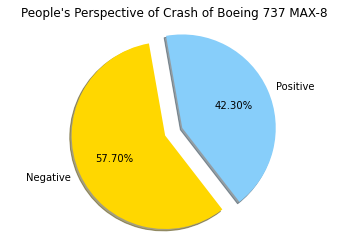

In [47]:
a=0
b=0

for i in y_pred:
    if i == "negative":
        a+=1
    elif i== "positive":
        b+=1
        
        
import matplotlib.pyplot as plt

labels = ["Negative","Positive"]
colors = ["gold", "lightskyblue"]
explode= [0, 0.2]
plt.title("People's Perspective of Crash of Boeing 737 MAX-8")
sizes = [b, a]
plt.pie(sizes, colors=colors, explode = explode, labels=labels, autopct="%.2f%%",  startangle=100, shadow = True)
plt.axis("equal")
plt.show()